# DATA PREPROCESSING

In [ ]:
import cv2
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = './drive/MyDrive/face_mask_detection/dataset'
categories = list(filter(lambda item: item != '.DS_Store', os.listdir(data_path)))
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories, labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [ ]:
IMG_SIZE=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path, category)
    img_names = os.listdir(folder_path) 
    
    for name in img_names:
        img_path=os.path.join(folder_path, name)
        img = cv2.imread(img_path)

        try:
            # Converting the image into gray scale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Resizing the gray scale into 50x50 (because we need a fixed common size for all images)
            resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
            data.append(resized)
            target.append(label_dict[category])
            # Appending the image and the label (categorized) into the list (dataset)
            
        except Excpetion as e:
            # If any Excpetion raised, it is catched here and passed to next image
            print("Excpetion", e)

In [ ]:
import numpy as np

data = np.array(data) / 255.0
data = np.reshape(data, (data.shape[0], IMG_SIZE, IMG_SIZE, 1))
target = np.array(target)

from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

In [ ]:
np.save('data', data)
np.save('target', new_target)

# TRAINING CONVOLUTIONAL NEURAL NETWORK




In [ ]:
data = np.load('data.npy')
target = np.load('target.npy')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten
from tensorflow.keras.layers import MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
10/10 [==============================] - 24s 2s/step - loss: 0.6103 - accuracy: 0.6296 - val_loss: 0.5116 - val_accuracy: 0.8267
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
10/10 [==============================] - 23s 2s/step - loss: 0.4867 - accuracy: 0.8524 - val_loss: 0.4805 - val_accuracy: 0.8267
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
10/10 [==============================] - 23s 2s/step - loss: 0.4479 - accuracy: 0.8450 - val_loss: 0.4787 - val_accuracy: 0.8267
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
10/10 [==============================] - 23s 2s/step - loss: 0.4854 - accuracy: 0.8141 - val_loss: 0.4863 - val_accuracy: 0.8267
Epoch 5/20
10/10 [==============================] - 23s 2s/step - loss: 0.5018 - accuracy: 0.8165 - val_loss: 0.4624 - val_accuracy: 0.8267
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/20
10/10 [==============================] - 23s 2s/step - lo

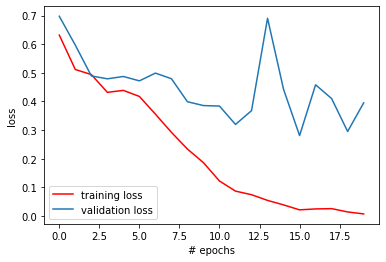

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel("# epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

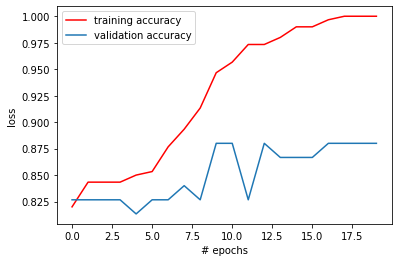

In [ ]:
plt.plot(history.history['accuracy'],'r', label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel("# epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data, test_target))

2/2 [==============================] - 0s 94ms/step - loss: 0.2261 - accuracy: 0.8810
[0.22611843049526215, 0.8809523582458496]
